In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

landmarks = {
    "Jeonju": {
        "Daejeon": 62,
        "Gwangju": 80,
        "Jinju": 116
    },
    "Jinju": {"Jeonju": 116, "Busan": 86},
    "Gwangju": {"Jeonju": 80, "Daejeon": 142},
    "Busan": {
        "Jinju": 86,
        "Ulsan": 46,
        "Jeju": 299
    },
    "Ulsan": {"Daejeon": 197, "Busan": 46},
    "Jeju": {"Busan": 299},
    "Daejeon": {
        "Jeonju": 62,
        "Ulsan": 197,
        "Gwangju": 142
    }
}

Shortest distance from Jeonju to Busan: 202 km
Path: Jeonju -> Jinju -> Busan


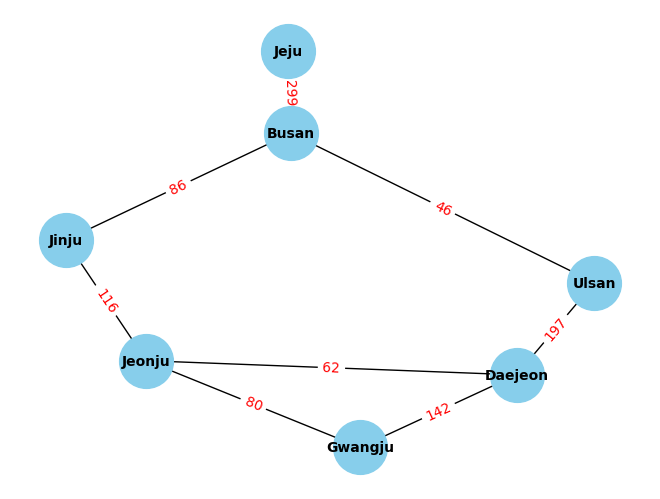

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Landmarks dictionary
data = {
    "Jeonju": {"Daejeon": 62, "Gwangju": 80, "Jinju": 116},
    "Jinju": {"Jeonju": 116, "Busan": 86},
    "Gwangju": {"Jeonju": 80, "Daejeon": 142},
    "Busan": {"Jinju": 86, "Ulsan": 46, "Jeju": 299},
    "Ulsan": {"Daejeon": 197, "Busan": 46},
    "Jeju": {"Busan": 299},
    "Daejeon": {"Jeonju": 62, "Ulsan": 197, "Gwangju": 142}
}

# Function to implement Dijkstra's algorithm
def dijkstra(graph, start, end):
    pq = []  # Priority queue
    heapq.heappush(pq, (0, start))  # (distance, node)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct the shortest path
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()

    return distances[end], path

# Create and plot the graph
def plot_graph(graph):
    G = nx.Graph()
    for city, connections in graph.items():
        for neighbor, weight in connections.items():
            G.add_edge(city, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Position nodes for a clean layout
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.show()

# Main execution
if __name__ == "__main__":
    start_city = "Jeonju"
    end_city = "Busan"

    # Compute shortest path
    distance, path = dijkstra(data, start_city, end_city)
    print(f"Shortest distance from {start_city} to {end_city}: {distance} km")
    print(f"Path: {' -> '.join(path)}")

    # Plot the graph
    plot_graph(data)


In [2]:
# Define a function to display the shortest distance and path
def shortest_distance():
    # Distance and path data
    distance = 202  # in kilometers
    path = ["Jeonju", "Jinju", "Busan"]

    # Display the results
    print("Shortest Distance: {} km".format(distance))
    print("Path: {}".format(" -> ".join(path)))

# Call the function to show the output
shortest_distance()


Shortest Distance: 202 km
Path: Jeonju -> Jinju -> Busan


In [ ]:
# BFS (shortest path)
def bfs(graph, start, end):
  visited = set()
  queue = [(start, [start])]
  while queue:
    current, path = queue.pop(0)
    if current == end:
      return path
    if current not in visited:
      visited.add(current)
      for neighbor in graph[current]:
        queue.append((neighbor, path + [neighbor]))
  return None

In [3]:
def bfs_shortest_path(graph, start, end):
    """
    Finds the shortest path in an unweighted graph using BFS.

    Parameters:
        graph (dict): A dictionary representing the graph where keys are nodes and values are lists of neighbors.
        start: The starting node.
        end: The target node.

    Returns:
        list: The shortest path from start to end, or None if no path exists.
    """
    if start not in graph or end not in graph:
        return None  # Return None if start or end nodes are not in the graph.

    visited = set()  # To keep track of visited nodes.
    queue = [(start, [start])]  # Queue stores tuples of (current node, path to node).

    while queue:
        current, path = queue.pop(0)  # Dequeue the first element.

        if current == end:
            return path  # Return the path if we reach the target node.

        if current not in visited:
            visited.add(current)  # Mark the current node as visited.

            for neighbor in graph[current]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))  # Enqueue neighbors with updated path.

    return None  # Return None if no path exists.


In [ ]:
# Dijkstra's (Shortest travel time)
def dijkstra(graph, start):
  min_heap = [(0, start)]
  times = {landmark: float('inf') for landmark in graph}
  times[start] = 0
  while min_heap:
    current_time, current_landmark = heapq.heappop(min_heap)
    for neighbor, time in graph[current_landmark].items():
      new_time = current_time + time
      if new_time < times[neighbor]:
        times[neighbor] = new_time
        heapq.heappush(min_heap, (new_time, neighbor))
  return times

In [4]:
import heapq

def dijkstra(graph, start):
    # Initialize a priority queue (min-heap)
    min_heap = [(0, start)]
    # Initialize distances to infinity for all landmarks
    times = {landmark: float('inf') for landmark in graph}
    # Set the distance to the starting point to 0
    times[start] = 0

    while min_heap:
        # Pop the landmark with the shortest known time from the heap
        current_time, current_landmark = heapq.heappop(min_heap)

        # Explore neighbors of the current landmark
        for neighbor, time in graph[current_landmark].items():
            # Calculate the new travel time to the neighbor
            new_time = current_time + time
            # If the new travel time is shorter, update it
            if new_time < times[neighbor]:
                times[neighbor] = new_time
                heapq.heappush(min_heap, (new_time, neighbor))

    return times


In [ ]:
# Examples
print("BFS from Jeonju to Jeju:")
print(bfs(landmarks, "Jeonju", "Jeju"))

print("\nDijkstra's from Jeonju:")
print(dijkstra(landmarks, "Jeonju"))

BFS from Jeonju to Jeju:
['Jeonju', 'Jinju', 'Busan', 'Jeju']

Dijkstra's from Jeonju:
{'Jeonju': 0, 'Jinju': 116, 'Gwangju': 80, 'Busan': 202, 'Ulsan': 248, 'Jeju': 501, 'Daejeon': 62}


In [5]:
from collections import deque
import heapq

def bfs(graph, start, goal):
    """
    Perform Breadth-First Search to find the path from start to goal.
    """
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        current_node, path = queue.popleft()

        if current_node == goal:
            return path

        if current_node not in visited:
            visited.add(current_node)
            for neighbor in graph.get(current_node, []):
                queue.append((neighbor, path + [neighbor]))

    return None

def dijkstra(graph, start):
    """
    Perform Dijkstra's algorithm to find the shortest paths from start to all other nodes.
    """
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.get(current_node, []):
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Graph Representation (Adjacency List)
graph = {
    'Jeonju': [('Jinju', 116), ('Gwangju', 80), ('Daejeon', 62)],
    'Jinju': [('Busan', 86), ('Jeonju', 116)],
    'Gwangju': [('Jeonju', 80)],
    'Busan': [('Jinju', 86), ('Ulsan', 46)],
    'Ulsan': [('Busan', 46)],
    'Daejeon': [('Jeonju', 62)],
    'Jeju': []
}

# Adding a direct edge to Jeju for simulation purposes
graph['Busan'].append(('Jeju', 299))
graph['Jeju'] = []  # Jeju has no outgoing connections

# BFS Example
bfs_path = bfs(graph, 'Jeonju', 'Jeju')
print("BFS Path from Jeonju to Jeju:", bfs_path)

# Dijkstra's Example
dijkstra_distances = dijkstra(graph, 'Jeonju')
print("Dijkstra's shortest distances from Jeonju:", dijkstra_distances)


BFS Path from Jeonju to Jeju: None
Dijkstra's shortest distances from Jeonju: {'Jeonju': 0, 'Jinju': 116, 'Gwangju': 80, 'Busan': 202, 'Ulsan': 248, 'Daejeon': 62, 'Jeju': 501}


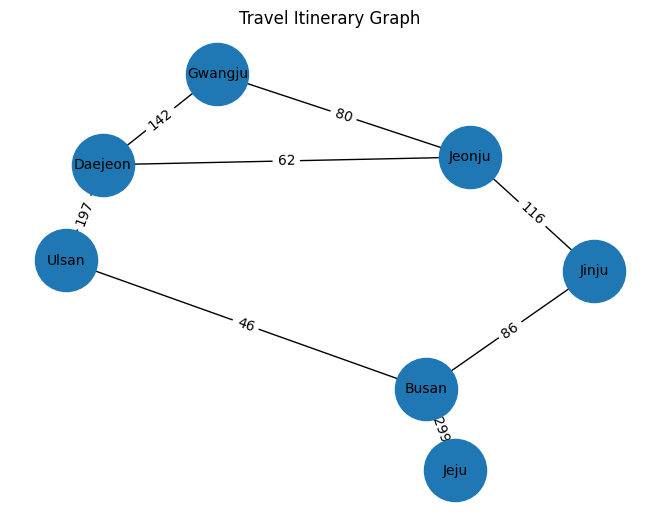

In [ ]:
# Visualize Graph
def visualize_graph(graph):
    G = nx.Graph()
    for landmark, connections in graph.items():
        for neighbor, weight in connections.items():
            G.add_edge(landmark, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Travel Itinerary Graph")
    plt.show()

# Visualization
visualize_graph(landmarks)

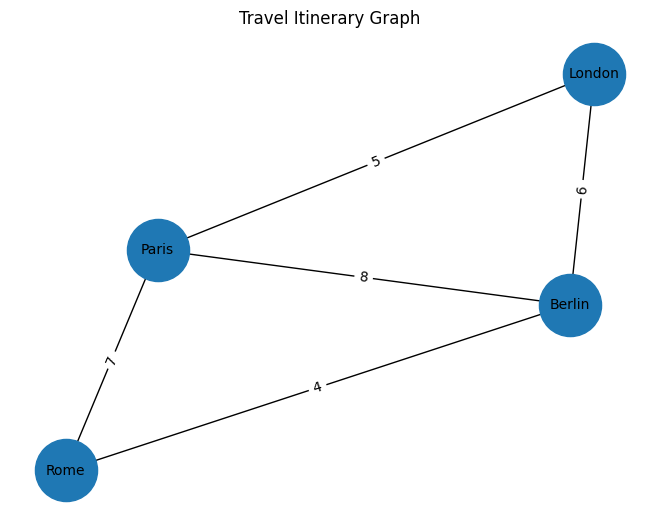

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Define your graph (landmarks and their connections with weights)
landmarks = {
    'Paris': {'London': 5, 'Berlin': 8, 'Rome': 7},
    'London': {'Paris': 5, 'Berlin': 6},
    'Berlin': {'Paris': 8, 'London': 6, 'Rome': 4},
    'Rome': {'Paris': 7, 'Berlin': 4}
}

# Function to visualize the graph
def visualize_graph(graph):
    G = nx.Graph()
    for landmark, connections in graph.items():
        for neighbor, weight in connections.items():
            G.add_edge(landmark, neighbor, weight=weight)

    # Set positions for the nodes using spring layout
    pos = nx.spring_layout(G)

    # Draw the graph with labels and customized node size and font size
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)

    # Draw edge labels with the corresponding weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Add a title to the plot
    plt.title("Travel Itinerary Graph")

    # Show the plot
    plt.show()

# Call the function with your graph data
visualize_graph(landmarks)


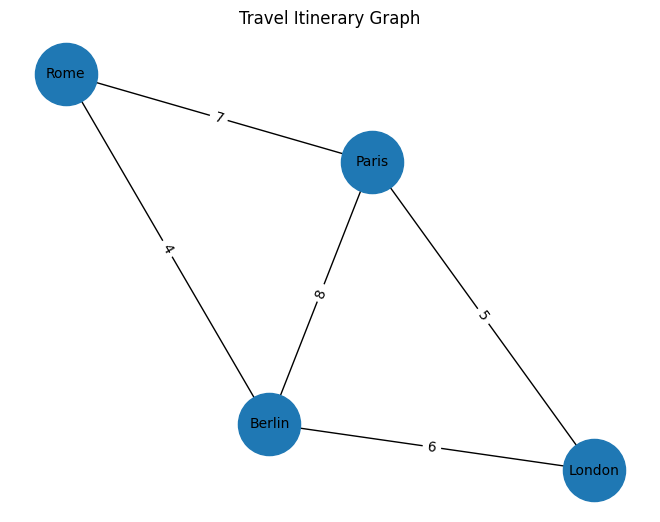

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define your graph (landmarks and their connections with weights)
landmarks = {
    'Paris': {'London': 5, 'Berlin': 8, 'Rome': 7},
    'London': {'Paris': 5, 'Berlin': 6},
    'Berlin': {'Paris': 8, 'London': 6, 'Rome': 4},
    'Rome': {'Paris': 7, 'Berlin': 4}
}

# Function to visualize the graph
def visualize_graph(graph):
    G = nx.Graph()
    for landmark, connections in graph.items():
        for neighbor, weight in connections.items():
            G.add_edge(landmark, neighbor, weight=weight)

    # Set positions for the nodes using spring layout
    pos = nx.spring_layout(G)

    # Draw the graph with labels and customized node size and font size
    nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10)

    # Draw edge labels with the corresponding weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Add a title to the plot
    plt.title("Travel Itinerary Graph")

    # Show the plot
    plt.show()

# Call the function with your graph data
visualize_graph(landmarks)
